# Segmentace buněk imunitního systému

Tento notebook slouží k segmentaci mikroskopických snímků buněk imunitního systému. Pomocí vlastního algoritmu segmentace je identifikována a zvýrazněna jedna konkrétní buňka v obraze.

### Použité metody:
- CLAHE (adaptivní histogramové vyrovnání kontrastu)
- Gaussovo rozostření
- Sobelův filter (gradient intenzity)
- Prahování a mofrologické filtrování
- Vzdálenostní transformace
- Segmentace pomocí watershed
- Výběr největší oblasti a její zvíraznění

### Použité knihovny:
OpenCV, NumPy, Matplotlib, scikit-image

### Poznámky

Původní mikroskopické snímky naleznete v repozitáři ve složce images/

# Basophil

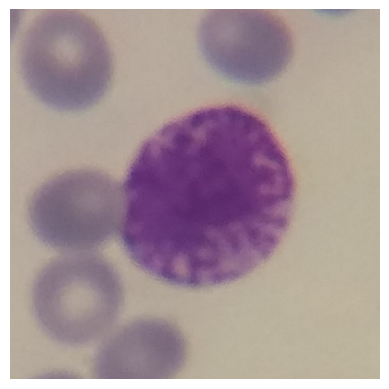

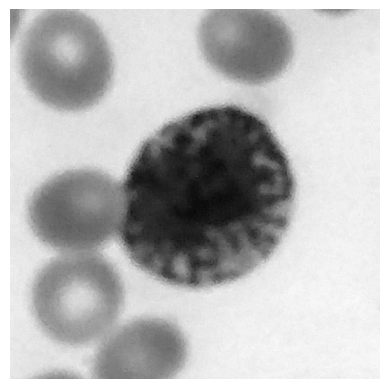

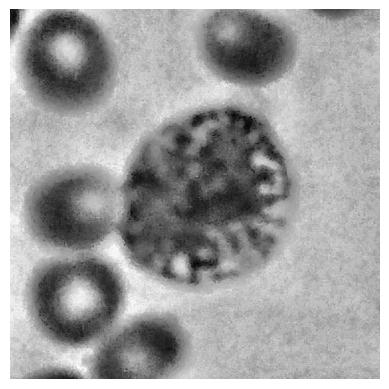

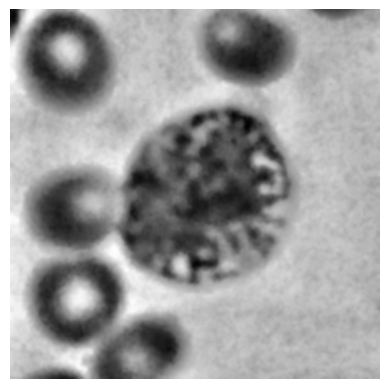

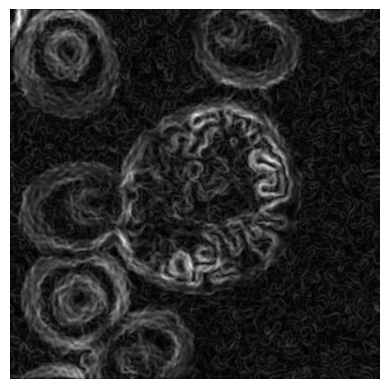

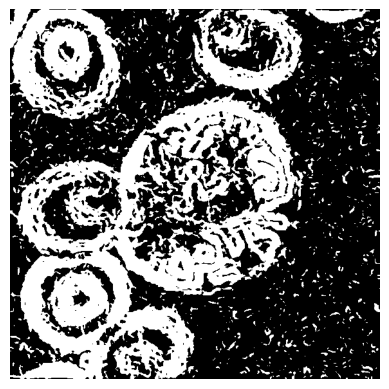

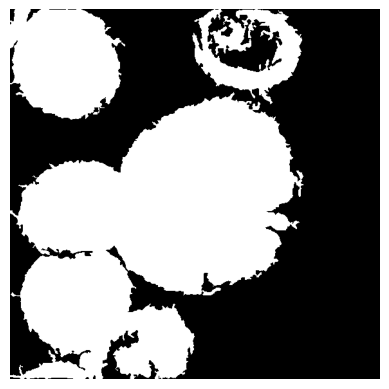

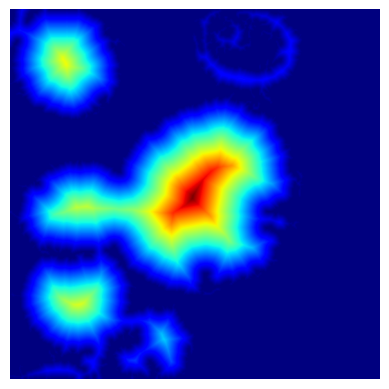

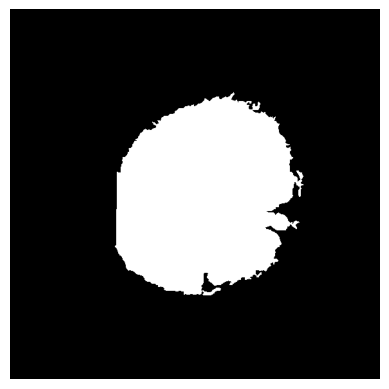

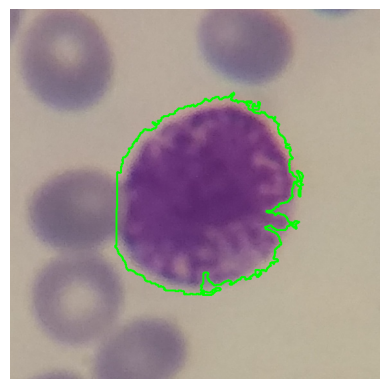

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Načtení obrázku
img = cv2.imread('basophil.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Převod do šedé škály
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# CLAHE – adaptivní zvýšení kontrastu
clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()

# Gaussovo rozostření
blurred = cv2.GaussianBlur(enhanced, (11, 11), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

# Výpočet gradientu intenzity (Sobel filtr)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobelx, sobely)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Prahování na gradientu
_, grad_thresh = cv2.threshold(gradient, 20, 5000, cv2.THRESH_BINARY)
plt.imshow(grad_thresh, cmap='gray')
plt.axis('off')
plt.show()

# Čištění – odstranění malých kontur/šumu
contours, _ = cv2.findContours(grad_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(grad_thresh)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000 :
        cv2.drawContours(mask, [cnt], -1, 255, -1)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# Distance transform
dist_transform = cv2.distanceTransform(mask, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='jet')
plt.axis('off')
plt.show()

# Markery pro watershed
coordinates = peak_local_max(dist_transform, min_distance=100, labels=mask)
markers = np.zeros_like(dist_transform, dtype=np.int32)
for i, (r, c) in enumerate(coordinates, 1):
    markers[r, c] = i

# Segmentace watershed
labels = watershed(-dist_transform, markers, mask=mask)
unique_labels = np.unique(labels)
max_area = 0
target_label = 0
for label_id in unique_labels:
    if label_id == 0:
        continue
    mask = (labels == label_id).astype(np.uint8)
    area = cv2.countNonZero(mask)
    if area > max_area:
        max_area = area
        target_label = label_id

# Filtr segmentů
filtered_labels = np.zeros_like(labels)
filtered_labels[labels == target_label] = 1
plt.imshow(filtered_labels, cmap='gray')
plt.axis('off')
plt.show()

# Binární maska
mask_uint8 = (filtered_labels > 0).astype(np.uint8) * 255
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Obrys nalezené kontury na původním obrázku
overlay = img_rgb.copy()
cv2.drawContours(overlay, contours, -1, (0, 255, 0), thickness=2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

# Eosinophil

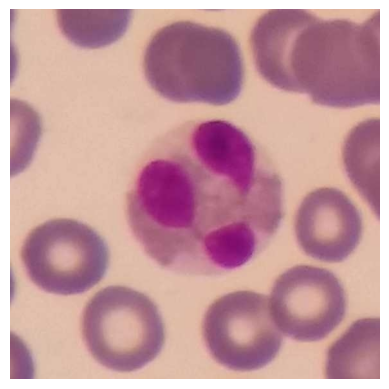

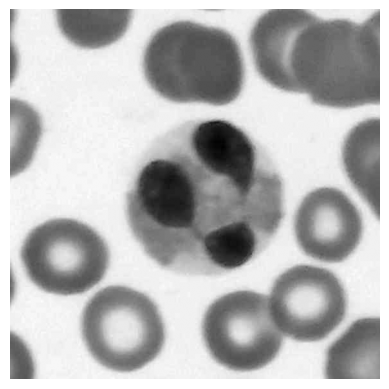

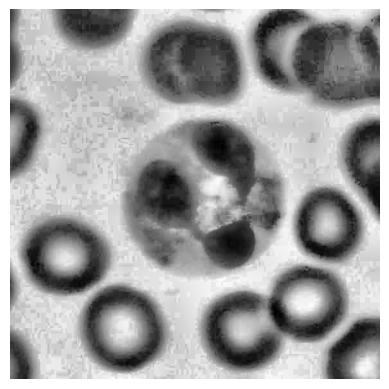

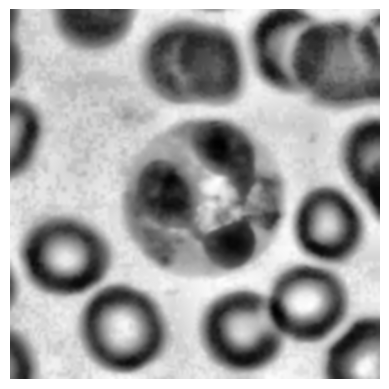

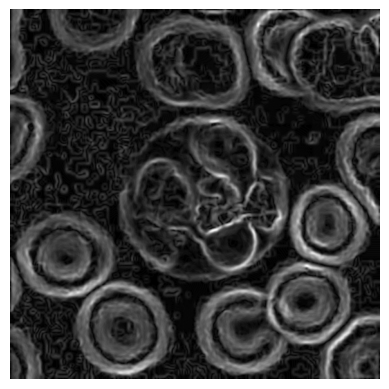

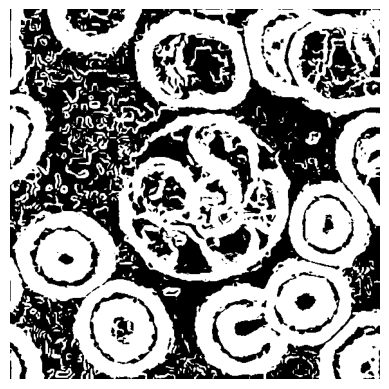

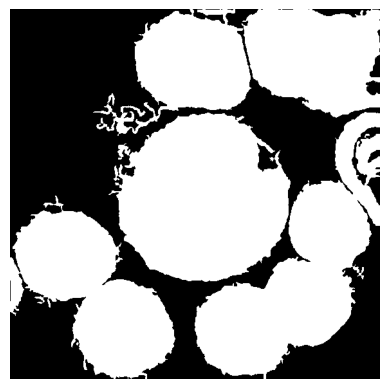

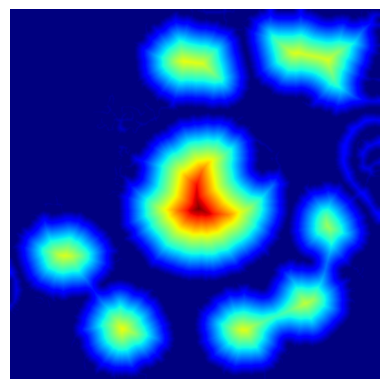

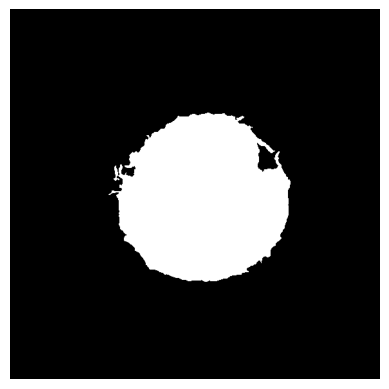

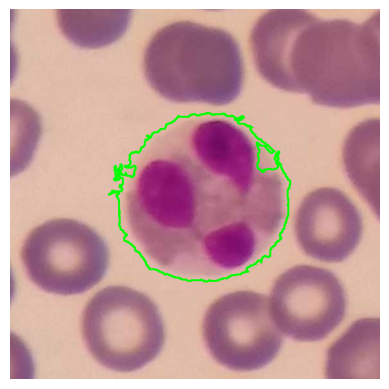

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Načtení obrázku
img = cv2.imread('eosinophil.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Převod do šedé škály
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# CLAHE – adaptivní zvýšení kontrastu
clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()

# Gaussovo rozostření
blurred = cv2.GaussianBlur(enhanced, (11, 11), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

# Výpočet gradientu intenzity (Sobel filtr)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobelx, sobely)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Prahování na gradientu
_, grad_thresh = cv2.threshold(gradient, 20, 5000, cv2.THRESH_BINARY)
plt.imshow(grad_thresh, cmap='gray')
plt.axis('off')
plt.show()

# Čištění – odstranění malých kontur/šumu
contours, _ = cv2.findContours(grad_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(grad_thresh)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000 :
        cv2.drawContours(mask, [cnt], -1, 255, -1)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# Distance transform
dist_transform = cv2.distanceTransform(mask, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='jet')
plt.axis('off')
plt.show()

# Markery pro watershed
coordinates = peak_local_max(dist_transform, min_distance=100, labels=mask)
markers = np.zeros_like(dist_transform, dtype=np.int32)
for i, (r, c) in enumerate(coordinates, 1):
    markers[r, c] = i

# Segmentace watershed
labels = watershed(-dist_transform, markers, mask=mask)
unique_labels = np.unique(labels)
max_area = 0
target_label = 0
for label_id in unique_labels:
    if label_id == 0:
        continue
    mask = (labels == label_id).astype(np.uint8)
    area = cv2.countNonZero(mask)
    if area > max_area:
        max_area = area
        target_label = label_id

# Filtr segmentů
filtered_labels = np.zeros_like(labels)
filtered_labels[labels == target_label] = 1
plt.imshow(filtered_labels, cmap='gray')
plt.axis('off')
plt.show()

# Binární maska
mask_uint8 = (filtered_labels > 0).astype(np.uint8) * 255
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Obrys nalezené kontury na původním obrázku
overlay = img_rgb.copy()
cv2.drawContours(overlay, contours, -1, (0, 255, 0), thickness=2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

# Lymphocyte

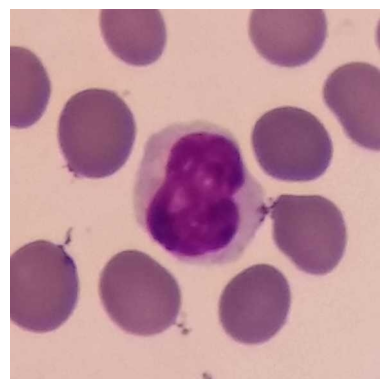

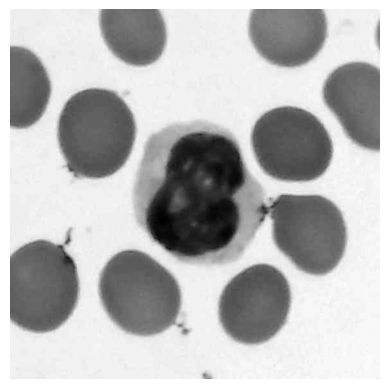

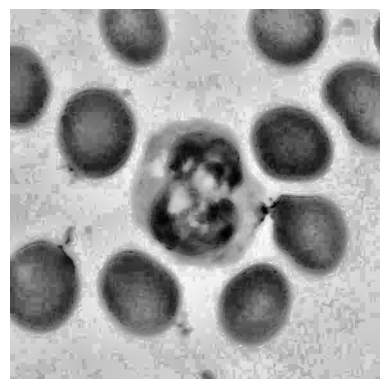

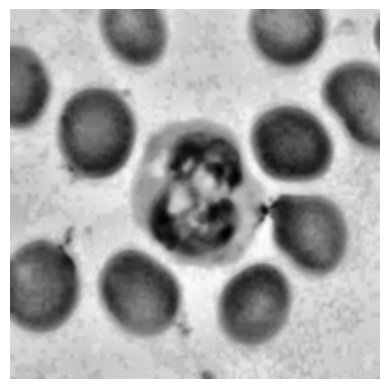

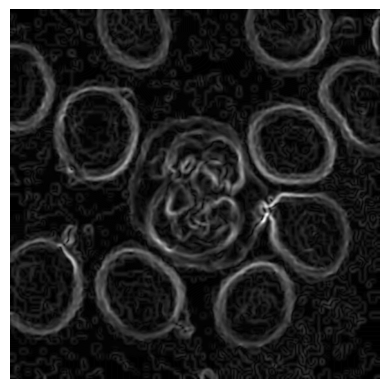

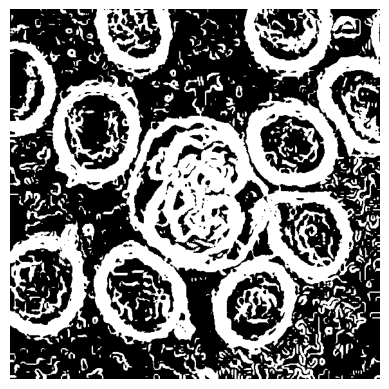

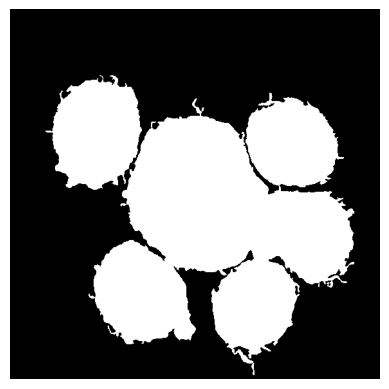

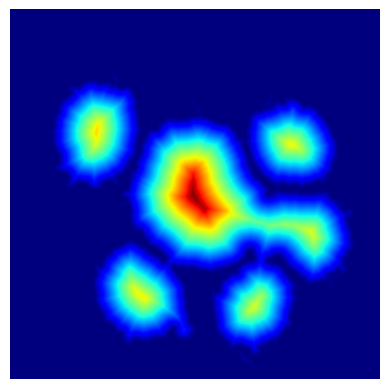

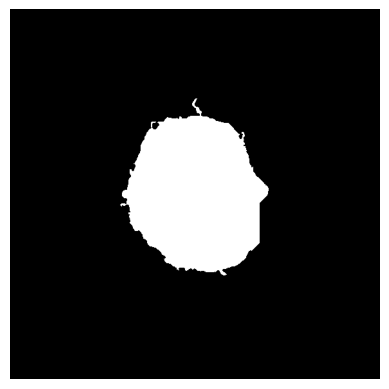

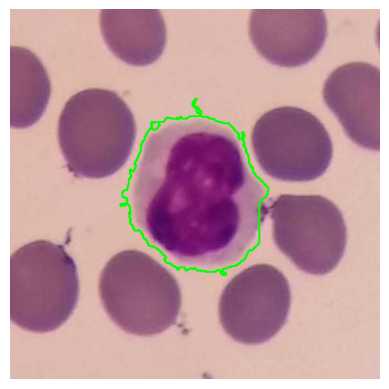

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Načtení obrázku
img = cv2.imread('lymphocyte.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Převod do šedé škály
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# CLAHE – adaptivní zvýšení kontrastu
clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()

# Gaussovo rozostření
blurred = cv2.GaussianBlur(enhanced, (11, 11), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

# Výpočet gradientu intenzity (Sobel filtr)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobelx, sobely)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Prahování na gradientu
_, grad_thresh = cv2.threshold(gradient, 20, 5000, cv2.THRESH_BINARY)
plt.imshow(grad_thresh, cmap='gray')
plt.axis('off')
plt.show()

# Čištění – odstranění malých kontur/šumu
contours, _ = cv2.findContours(grad_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(grad_thresh)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000 :
        cv2.drawContours(mask, [cnt], -1, 255, -1)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# Distance transform
dist_transform = cv2.distanceTransform(mask, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='jet')
plt.axis('off')
plt.show()

# Markery pro watershed
coordinates = peak_local_max(dist_transform, min_distance=100, labels=mask)
markers = np.zeros_like(dist_transform, dtype=np.int32)
for i, (r, c) in enumerate(coordinates, 1):
    markers[r, c] = i

# Segmentace watershed
labels = watershed(-dist_transform, markers, mask=mask)
unique_labels = np.unique(labels)
max_area = 0
target_label = 0
for label_id in unique_labels:
    if label_id == 0:
        continue
    mask = (labels == label_id).astype(np.uint8)
    area = cv2.countNonZero(mask)
    if area > max_area:
        max_area = area
        target_label = label_id

# Filtr segmentů
filtered_labels = np.zeros_like(labels)
filtered_labels[labels == target_label] = 1
plt.imshow(filtered_labels, cmap='gray')
plt.axis('off')
plt.show()

# Binární maska
mask_uint8 = (filtered_labels > 0).astype(np.uint8) * 255
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Obrys nalezené kontury na původním obrázku
overlay = img_rgb.copy()
cv2.drawContours(overlay, contours, -1, (0, 255, 0), thickness=2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

# Monocyte

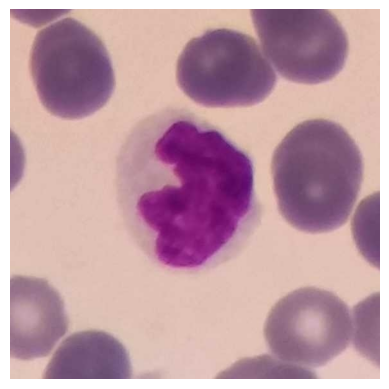

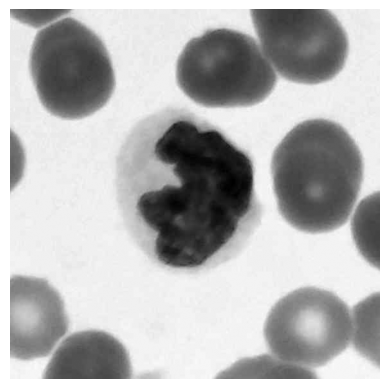

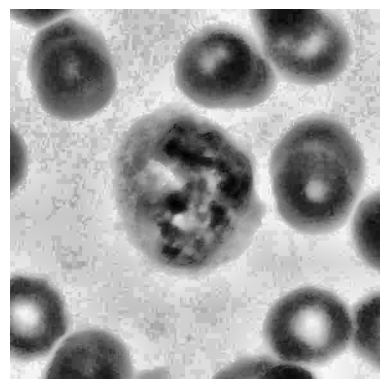

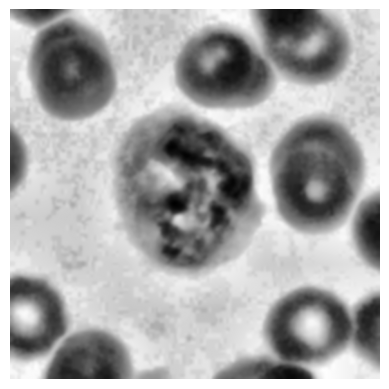

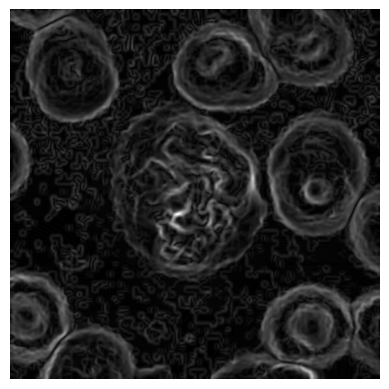

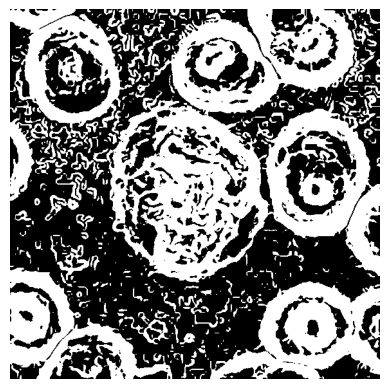

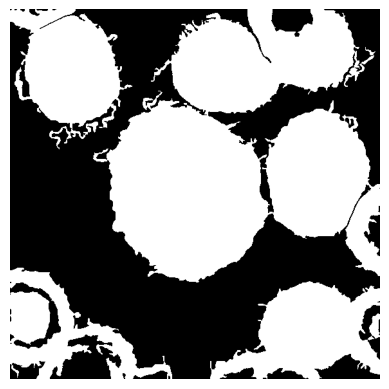

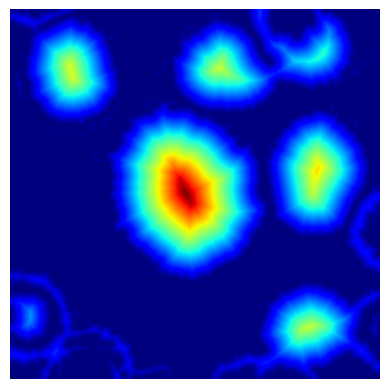

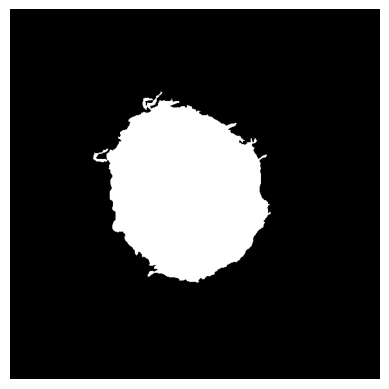

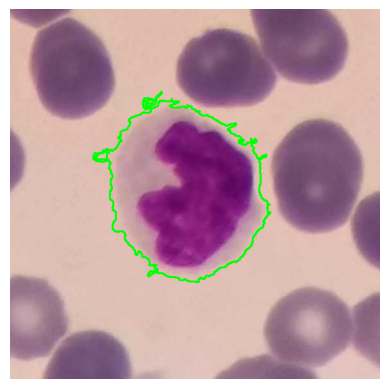

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Načtení obrázku
img = cv2.imread('monocyte.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Převod do šedé škály
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# CLAHE – adaptivní zvýšení kontrastu
clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()

# Gaussovo rozostření
blurred = cv2.GaussianBlur(enhanced, (11, 11), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

# Výpočet gradientu intenzity (Sobel filtr)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobelx, sobely)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Prahování na gradientu
_, grad_thresh = cv2.threshold(gradient, 20, 5000, cv2.THRESH_BINARY)
plt.imshow(grad_thresh, cmap='gray')
plt.axis('off')
plt.show()

# Čištění – odstranění malých kontur/šumu
contours, _ = cv2.findContours(grad_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(grad_thresh)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000 :
        cv2.drawContours(mask, [cnt], -1, 255, -1)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# Distance transform
dist_transform = cv2.distanceTransform(mask, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='jet')
plt.axis('off')
plt.show()

# Markery pro watershed
coordinates = peak_local_max(dist_transform, min_distance=100, labels=mask)
markers = np.zeros_like(dist_transform, dtype=np.int32)
for i, (r, c) in enumerate(coordinates, 1):
    markers[r, c] = i

# Segmentace watershed
labels = watershed(-dist_transform, markers, mask=mask)
unique_labels = np.unique(labels)
max_area = 0
target_label = 0
for label_id in unique_labels:
    if label_id == 0:
        continue
    mask = (labels == label_id).astype(np.uint8)
    area = cv2.countNonZero(mask)
    if area > max_area:
        max_area = area
        target_label = label_id

# Filtr segmentů
filtered_labels = np.zeros_like(labels)
filtered_labels[labels == target_label] = 1
plt.imshow(filtered_labels, cmap='gray')
plt.axis('off')
plt.show()

# Binární maska
mask_uint8 = (filtered_labels > 0).astype(np.uint8) * 255
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Obrys nalezené kontury na původním obrázku
overlay = img_rgb.copy()
cv2.drawContours(overlay, contours, -1, (0, 255, 0), thickness=2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

# Neutrophil

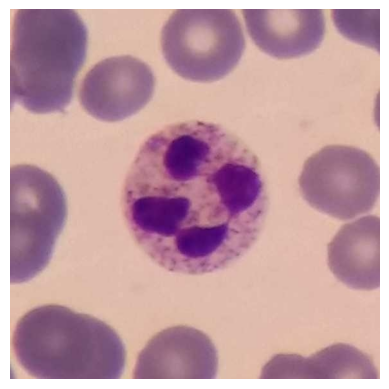

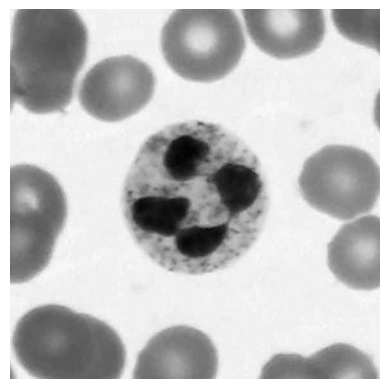

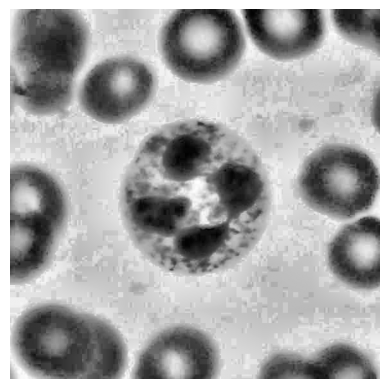

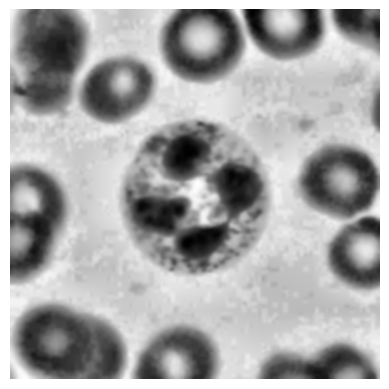

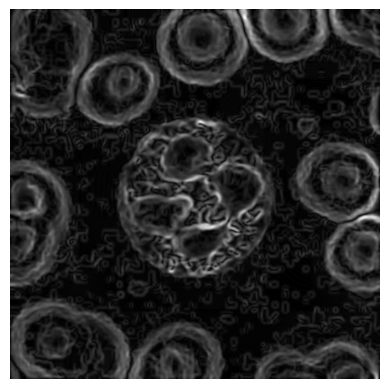

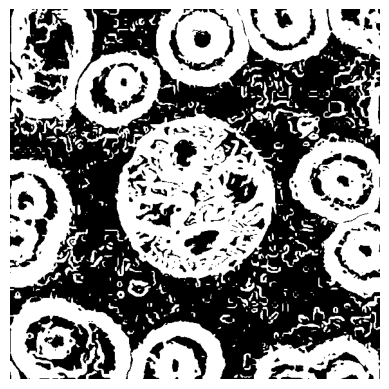

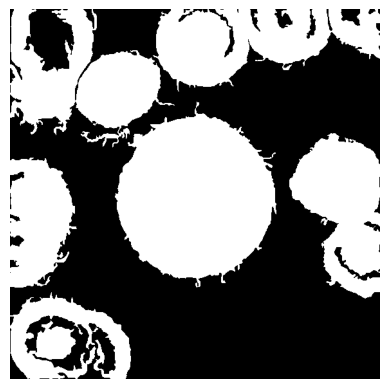

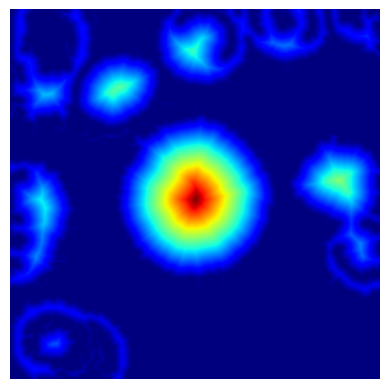

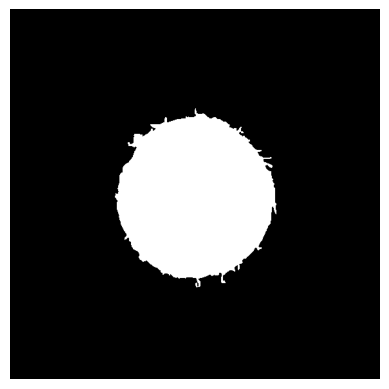

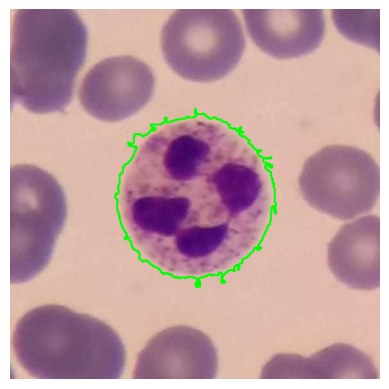

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Načtení obrázku
img = cv2.imread('neutrophil.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Převod do šedé škály
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# CLAHE – adaptivní zvýšení kontrastu
clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()

# Gaussovo rozostření
blurred = cv2.GaussianBlur(enhanced, (11, 11), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

# Výpočet gradientu intenzity (Sobel filtr)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobelx, sobely)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Prahování na gradientu
_, grad_thresh = cv2.threshold(gradient, 20, 5000, cv2.THRESH_BINARY)
plt.imshow(grad_thresh, cmap='gray')
plt.axis('off')
plt.show()

# Čištění – odstranění malých kontur/šumu
contours, _ = cv2.findContours(grad_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(grad_thresh)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000 :
        cv2.drawContours(mask, [cnt], -1, 255, -1)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# Distance transform
dist_transform = cv2.distanceTransform(mask, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='jet')
plt.axis('off')
plt.show()

# Markery pro watershed
coordinates = peak_local_max(dist_transform, min_distance=100, labels=mask)
markers = np.zeros_like(dist_transform, dtype=np.int32)
for i, (r, c) in enumerate(coordinates, 1):
    markers[r, c] = i

# Segmentace watershed
labels = watershed(-dist_transform, markers, mask=mask)
unique_labels = np.unique(labels)
max_area = 0
target_label = 0
for label_id in unique_labels:
    if label_id == 0:
        continue
    mask = (labels == label_id).astype(np.uint8)
    area = cv2.countNonZero(mask)
    if area > max_area:
        max_area = area
        target_label = label_id

# Filtr segmentů
filtered_labels = np.zeros_like(labels)
filtered_labels[labels == target_label] = 1
plt.imshow(filtered_labels, cmap='gray')
plt.axis('off')
plt.show()

# Binární maska
mask_uint8 = (filtered_labels > 0).astype(np.uint8) * 255
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Obrys nalezené kontury na původním obrázku
overlay = img_rgb.copy()
cv2.drawContours(overlay, contours, -1, (0, 255, 0), thickness=2)
plt.imshow(overlay)
plt.axis('off')
plt.show()